In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("results/llm summary output - human eval.csv")
df = df[:50]
df

,dialog,summary,1,2,3,4,winner,catastrophic
0,Write one sentence that summarizes this conver...,The conversation discusses the Natalia Grace c...,This conversation revolves around the Natalia ...,The conversation centers around the Natalia Gr...,The conversation discusses the Natalia Grace c...,The conversation has covered the following top...,1,NaN
1,Write one sentence that summarizes this conver...,The conversation discusses the recent performa...,This conversation discusses the Warriors' impr...,The conversation centers around the NBA playof...,The conversation centers around the performanc...,**Summary:**\n\nThe conversation centered arou...,"1,3",NaN
2,Write one sentence that summarizes this conver...,The conversation revolved around Jared Goff's ...,"In this conversation, the speaker discusses th...",The conversation centered around the performan...,The conversation centers around the performanc...,"This conversation has covered several points, ...",2,NaN
3,Write one sentence that summarizes this conver...,The conversation focused on the significance o...,This conversation discusses the relief and uni...,The conversation focused on the peaceful trans...,The conversation focused on the peaceful trans...,"""It was such a relief to finally see a peacefu...","2,3",NaN
4,Write one sentence that summarizes this conver...,The speakers discussed the competitive housing...,"This conversation, which includes mentions of ...",The conversation centers around the rising hou...,The conversation centers around the rising hou...,**Summary:**\n\nThe conversation has discussed...,"2,3",NaN
5,Write one sentence that summarizes this conver...,The speakers are discussing a planned rally by...,This conversation involves organizing a rally ...,The speakers are discussing plans to counter a...,The speakers are discussing a planned rally do...,**Summary:**\n\nWe need to ensure people know ...,"1,2,3",NaN
6,Write one sentence that summarizes this conver...,The conversation centers around reminiscing ab...,This conversation has covered various episodes...,The conversation centers around various episod...,The conversation centers around a discussion o...,"So I was thinking, what was the episode where ...","1,2",4
7,Write one sentence that summarizes this conver...,The conversation centers around Matthew Perry'...,This conversation has discussed various aspect...,The conversation centers around the career and...,The conversation centers around Matthew Perry'...,"So, I was just thinking about how Matthew Perr...","2,3",4
8,Write one sentence that summarizes this conver...,The conversation centers around the college ap...,This conversation has been a summary of the pr...,The conversation centers around the experience...,The conversation centers around the experience...,**Summary:**\n\nThe conversation revolves arou...,"1,2,3",NaN
9,Write one sentence that summarizes this conver...,The conversation focused on the ongoing politi...,This conversation discusses the heartbreaking ...,The conversation focused on the current politi...,The conversation focused on the recent militar...,The conversation has been interrupted by a sud...,3,NaN


In [12]:
all_winners = df.dropna(subset = ['winner'])["winner"].to_list()
",".join(all_winners)

'1,1,3,2,2,3,2,3,1,2,3,1,2,2,3,1,2,3,3,2,2,3,2,2,3,2,3,2,2,3,1,2,2,3,1,3,3,2,3,1,2,3,3,2,1,2,3,2,3,3,3,1,1,2,2,3,2,3,2,3,3,2,3,3,3,3,2,3,3,3,2,3,2,3,1,2,3,2,3'

In [18]:
models = ["1", "2", "3", "4"]
res = []

for model in models:
    res.append({model : all_winners.count(model)})


In [19]:
res

[{'1': 3}, {'2': 8}, {'3': 13}, {'4': 0}]

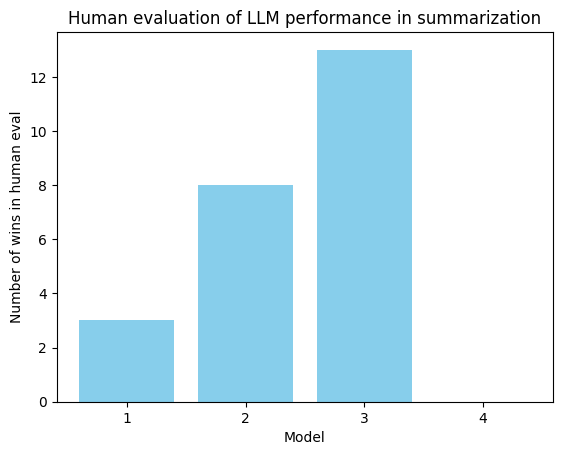

In [22]:
import matplotlib.pyplot as plt

# Given list
data = res

# Extract keys and values
labels = [list(d.keys())[0] for d in data]
values = [list(d.values())[0] for d in data]

# Create bar chart
plt.bar(labels, values, color='skyblue')

# Labels and title
plt.xlabel("Model")
plt.ylabel("Number of wins in human eval")
plt.title("Human evaluation of LLM performance in summarization")

# Show the plot
plt.show()
